In [41]:
# libraries
import pandas as pd
import graphviz
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

# load dataset (student Portuguese scores)
d = pd.read_csv('/home/j/Desktop/notebook/jupyterenv/Chapter01/dataset/student-por.csv', sep=';')
len(d)

649

In [42]:
# generate binary label (pass/fail) based on G1+G2+G3 (test grades, each 0-20 pts); threshold for passing is sum>=30
d['pass'] = d.apply(lambda row: 1 if (row['G1']+row['G2']+row['G3']) >= 35 else 0, axis=1)
d = d.drop(['G1', 'G2', 'G3'], axis=1)
d.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


In [43]:
# use one-hot encoding on categorical columns
d = pd.get_dummies(d, columns=['sex', 'school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
                               'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                               'nursery', 'higher', 'internet', 'romantic'])
d.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [44]:
# shuffle rows
d = d.sample(frac=1)
# split training and testing data
d_train = d[:500] #first 500 rows: training
d_test = d[500:] #last, 149 rows: test

d_train_att = d_train.drop(['pass'], axis=1) #drop "pass" column
d_train_pass = d_train['pass'] #assign "pass" column to train set

d_test_att = d_test.drop(['pass'], axis=1)#drop pass column
d_test_pass = d_test['pass'] #assign pass column to test set

d_att = d.drop(['pass'], axis=1)
d_pass = d['pass'] # apply "pass" column to entire dataset

# number of passing students in whole dataset:
print("Passing: %d out of %d (%.2f%%)" % (np.sum(d_pass), len(d_pass), 100*float(np.sum(d_pass)) / len(d_pass)))

Passing: 328 out of 649 (50.54%)


In [70]:
# fit a decision tree. Entropy, aka information gain (highest when outcome is more predictable after knowing certain value (ie male vs female))
t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
t = t.fit(d_train_att, d_train_pass)

In [71]:
# visualize tree - FIX: sudo apt-get install graphviz
#dot_data = tree.export_graphviz(t, out_file=None, label="all", impurity=False, proportion=True,
#                                feature_names=list(d_train_att), class_names=["fail", "pass"], 
#                                filled=True, rounded=True)
#graph = graphviz.Source(dot_data)
#graph

In [72]:
# save tree
#tree.export_graphviz(t, out_file="student-performance.dot", label="all", impurity=False, proportion=True,
#                     feature_names=list(d_train_att), class_names=["fail", "pass"], 
#                     filled=True, rounded=True)

In [73]:
t.score(d_test_att, d_test_pass)

0.7114093959731543

In [74]:
scores = cross_val_score(t, d_att, d_pass, cv=5) #
# show average score and +/- two standard deviations away (covering 95% of scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.68 (+/- 0.07)


In [75]:
#accuracy of a well-balanced data-set. (20:80 set)
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std() * 2))

Max depth: 1, Accuracy: 0.64 (+/- 0.05)
Max depth: 2, Accuracy: 0.69 (+/- 0.05)
Max depth: 3, Accuracy: 0.70 (+/- 0.08)
Max depth: 4, Accuracy: 0.68 (+/- 0.07)
Max depth: 5, Accuracy: 0.67 (+/- 0.08)
Max depth: 6, Accuracy: 0.67 (+/- 0.06)
Max depth: 7, Accuracy: 0.67 (+/- 0.08)
Max depth: 8, Accuracy: 0.66 (+/- 0.08)
Max depth: 9, Accuracy: 0.66 (+/- 0.09)
Max depth: 10, Accuracy: 0.67 (+/- 0.08)
Max depth: 11, Accuracy: 0.65 (+/- 0.04)
Max depth: 12, Accuracy: 0.64 (+/- 0.11)
Max depth: 13, Accuracy: 0.65 (+/- 0.09)
Max depth: 14, Accuracy: 0.65 (+/- 0.10)
Max depth: 15, Accuracy: 0.65 (+/- 0.08)
Max depth: 16, Accuracy: 0.66 (+/- 0.09)
Max depth: 17, Accuracy: 0.65 (+/- 0.11)
Max depth: 18, Accuracy: 0.64 (+/- 0.09)
Max depth: 19, Accuracy: 0.64 (+/- 0.07)


In [76]:
depth_acc = np.empty((19,3), float)
i = 0
for max_depth in range(1, 20): #20 sets down to reach a leaf node
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    depth_acc[i,0] = max_depth
    depth_acc[i,1] = scores.mean()
    depth_acc[i,2] = scores.std() * 2
    i += 1
    
depth_acc

array([[ 1.        ,  0.63791294,  0.04531993],
       [ 2.        ,  0.68725104,  0.04726894],
       [ 3.        ,  0.69652952,  0.07598752],
       [ 4.        ,  0.68262373,  0.06913982],
       [ 5.        ,  0.68418605,  0.07322547],
       [ 6.        ,  0.67032797,  0.06932939],
       [ 7.        ,  0.66572451,  0.09411866],
       [ 8.        ,  0.66570066,  0.08201256],
       [ 9.        ,  0.65947525,  0.09452632],
       [10.        ,  0.67338104,  0.09711027],
       [11.        ,  0.64258795,  0.07718364],
       [12.        ,  0.65652952,  0.10373326],
       [13.        ,  0.6410972 ,  0.10564176],
       [14.        ,  0.64723912,  0.09288896],
       [15.        ,  0.65186643,  0.08431048],
       [16.        ,  0.6410972 ,  0.09016982],
       [17.        ,  0.64566488,  0.07113701],
       [18.        ,  0.63181872,  0.07299455],
       [19.        ,  0.62102564,  0.05536562]])

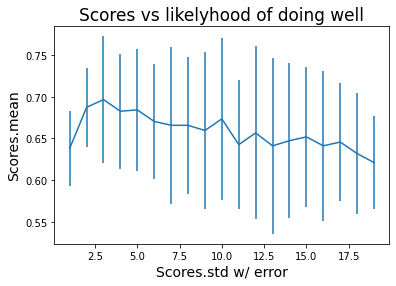

In [77]:
fig, ax = plt.subplots()
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr=depth_acc[:,2])
plt.title('Scores vs likelyhood of doing well', fontsize=17)
plt.xlabel('std.scores w/ error', fontsize=14)
plt.ylabel('mean.scores', fontsize=14)
plt.show()

In [56]:
print("Information gain is highest only when the outcome is more predictable after knowing thevalue in a certain column.")

Information gain is highest only when the outcome is more predictable after knowing thevalue in a certain column.


In [64]:
#Build a decision tree: import sklearn import tree
#t = tree.DecisionTreeClassifier(criterion="entropy")
#t = t.fit(test_attributes, train_labels) #build tree
#t.score(test_attributes, test_labels) #build tree
#t.predict(example_attributes) #predict new example
#cross_val_score(t, all_attributes, all_labels) #avg scores w/ cross-validation
print("basic framework for decision trees. Usually small, if too many attributes, specific branches will overfit trainging data which will decrease accuracy.")

basic framework for decision trees. Usually small, if too many attributes, specific branches will overfit trainging data which will decrease accuracy.


In [82]:
print("Conclusion: more depth does not give more power,'did you fail\n previously' does not provide you with same amount of info.\n")

Conclusion: more depth does not give more power,'did you fail
 previously' does not provide you with same amount of info.

